# earlySN Demo

In [25]:
%load_ext autoreload
%autoreload 2
from earlySN import dataset
from earlySN import lightcurve

import matplotlib.pyplot as plt

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rcParams.update({'font.size': 12})
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams["figure.autolayout"] = True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Creating a Dataset object

The base object for early excess searches is `dataset.Dataset`. To load a dataset analyzed in Ye et al. 2024 ([arXiv](https://arxiv.org/abs/2401.02926)), we can select a `default` mode.

In [ ]:
yao = dataset.Dataset(base_path = "/Users/christineye/earlySN/earlySN", default = "yao", bands = ['r', 'g'])

First we fit `SALT3` parameters for all SN in the dataset.

In [ ]:
yao.fit_salt(save_path = './demo/', verbose = False)

Let's take a look at the distributions of the `SALT3` fit parameters.

In [ ]:
yao.salt_stats()

Next, filter based on spectral type and `SALT3` parameters, and apply a correction for peculiar velocities. Note that the `Dataset` object allows you to set specific cut criteria for fit parameters and spectral type.

In [ ]:
yao.spectral_filter()
yao.pv_correction()
yao.param_cuts()

We can now fit Tripp parameters to produce a Hubble diagram.

In [ ]:
yao.fit_hubble(save_path = './demo/', verbose = True)

So far, everything we've done so far has been saved to `./demo`. In the future, we can reload fits directly from this folder.

In [11]:
yao.load_from_saved('./demo/')

Loaded Hubble diagram parameters
Loaded excess search results
Loaded lightcurve fit parameters


Now we can search for early excess supernovae. 

In [ ]:
yao.excess_search(verbose = False, save_path = './demo/')

In [33]:
yao.gold = ['ZTF18aayjvve',  'ZTF18abcflnz',
           'ZTF18abucvbf', 'ZTF18abxxssh', ]

yao.bronze = ['ZTF18aasdted', 'ZTF18abaxlpi', 'ZTF18abimsyv',
               'ZTF18abfgygp', 'ZTF18aaxsioa', 'ZTF18abssuxz', 'ZTF18abfhryc',
             'ZTF18aaslhxt', 'ZTF18aazsabq', 'ZTF18abauprj', ]

yao.gold_nd = ['ZTF18aavrzxp', 'ZTF18aawjywv', 'ZTF18aazblzy', 'ZTF18abcysdx', 'ZTF18abetehf', 'ZTF18abxygvv']

In [29]:
yao.excess = yao.gold + yao.bronze
yao.nd = []

for i in yao.sn_names:
    if i not in yao.gold and i not in yao.bronze:
        yao.nd += [i]

In [14]:
yao.N.loc['ZTF18aayjvve']['N'] = 8
yao.N.loc['ZTF18abcflnz']['N'] = 9
yao.N.loc['ZTF18abucvbf']['N'] = 8
yao.N.loc['ZTF18abxxssh']['N'] = 10
yao.N.loc['ZTF18aaslhxt']['N'] = 8
yao.N.loc['ZTF18aasdted']['N'] = 8
yao.N.loc['ZTF18aaxsioa']['N'] = 7
yao.N.loc['ZTF18aazsabq']['N'] = 8
yao.N.loc['ZTF18abaxlpi']['N'] = 9
yao.N.loc['ZTF18abauprj']['N'] = 9
yao.N.loc['ZTF18abimsyv']['N'] = 9
yao.N.loc['ZTF18abfgygp']['N'] = 9
yao.N.loc['ZTF18abfhryc']['N'] = 11
yao.N.loc['ZTF18abssuxz']['N'] = 4

With the early excess search complete, we can look at some properties of the lightcurve fits.

In [15]:
yao.compute_bump_properties()

1.4659002476895924 0.061476669948116784
1.60275101625857 0.059297920266044135
$\alpha_g - \alpha_r = 0.1368507685689777 \pm 0.08541442674272194$


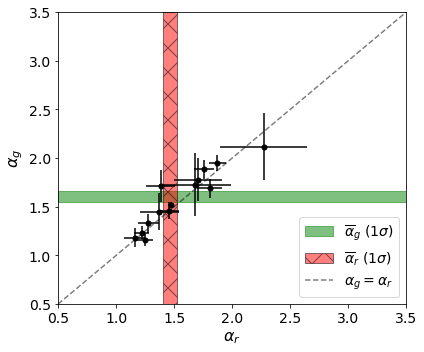

In [16]:
yao.analyze_PL(subset = "excess", save_fig = './demo/')

Gold x1:  -0.11334233834981915 0.08248991400318506
Excess x1:  0.056498407204904254 0.16376053472148386
No Excess x1:  -0.1423495125855333 0.09036803905597147
Gold c:  -0.0294057083608868 0.016775640432824375
Excess c:  -0.01325888661611 0.014141114672048144
No Excess c:  -0.0083482776928259 0.00658232060483673


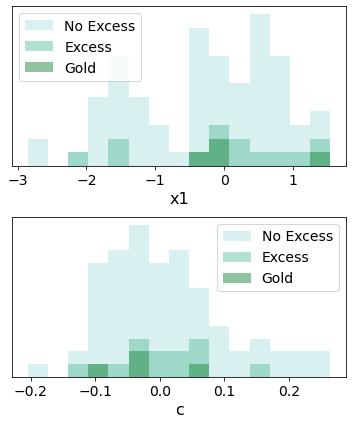

In [17]:
yao.compare_fit_params(save_fig = './demo/')

r : 0.049424119936038936 0.003730181505990448
g : 0.04496348429311966 0.005975153053976215
$fr - fg = -0.004460635642919278 \pm 0.007043912839187781$
$\log_{10}(G - R) = 0.09877730531565622 \pm 0.07297942143952438$


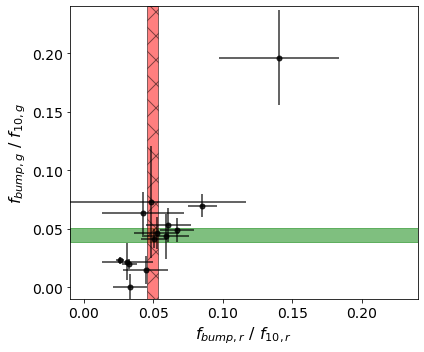

In [18]:
yao.analyze_bump_amps(save_fig = './demo/')

$\mu$ 1.0566089889392656 0.21972699781133992
$\sigma$ 0.7971218024927347 0.0794091419334663


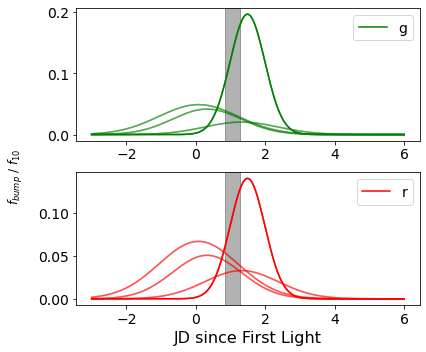

In [19]:
yao.analyze_bump_shapes(save_fig = './demo/')

r : 0.049424119936038936 0.003730181505990448
g : 0.04496348429311966 0.005975153053976215
$fr - fg = -0.004460635642919278 \pm 0.007043912839187781$
$\log_{10}(G - R) = 0.09877730531565622 \pm 0.07297942143952438$


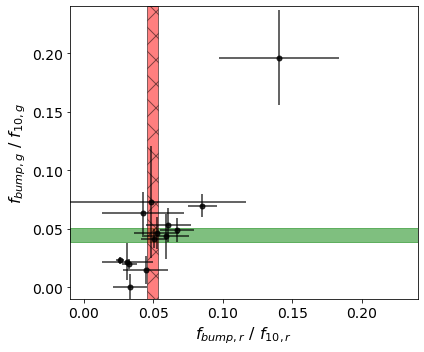

In [20]:
yao.analyze_bump_amps(save_fig = './demo/')

r PearsonRResult(statistic=0.2984273309960773, pvalue=0.3000310018882526)
g PearsonRResult(statistic=0.3872471932093308, pvalue=0.17132791312906923)


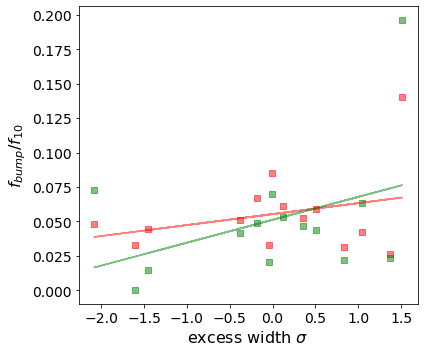

In [21]:
yao.analyze_stretch_correlation(save_fig = './demo/')

We can also produce the population-level analyses of Hubble residuals and host galaxy masses.

Overall scatter:  0.15387197695360505


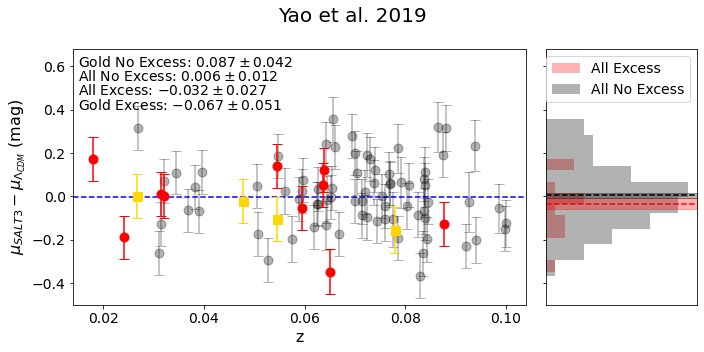

In [34]:
yao.compare_excess()

Levene : LeveneResult(statistic=0.3913437953994129, pvalue=0.5332505153192723)
Bartlett : BartlettResult(statistic=0.20037185118504347, pvalue=0.6544208657443735)


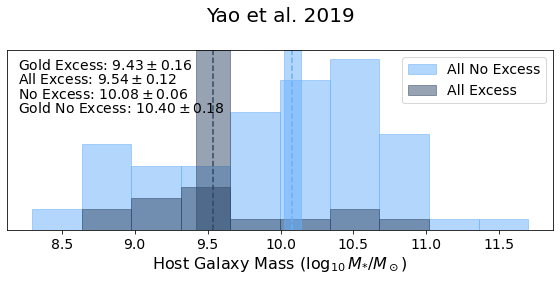

In [35]:
yao.compare_mass()

## Other handy functionality!

For more fine-grained analysis, we can fit a single supernova.

9 {'r': 0, 'g': 2}


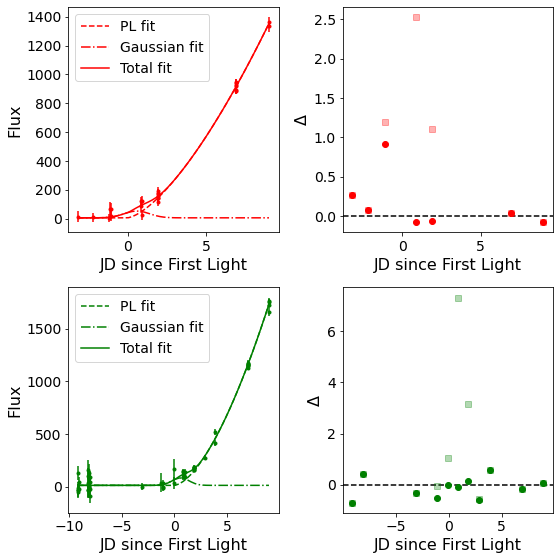

In [32]:
yao.fit_single_sn('ZTF18aaslhxt', cut = 9)

In [ ]:
yao.make_paper_table()